<hr/>

# Data Mining
**Tamás Budavári** - budavari@jhu.edu <br/>

- Introduction to spectral embedding and spectral clustering

<hr/>

In [ ]:
%pylab inline

<h1><font color="darkblue">Spectral Methods</font></h1>
<hr/>

## Statistical Learning

- The methods in general fall in these 4 categories

>|     Type       | Supervised     |         Unsupervised     |
 |:---------------|:--------------:|:------------------------:|
 | **Discrete**   | Classification | Clustering               |   
 | **Continuous** | Regression     | Dimensionality Reduction |

- Spectral clustering and embedding: unsupervised methods

## [Graph](https://en.wikipedia.org/wiki/Graph_(discrete_mathematics))

<img src=https://momath.org/wp-content/uploads/2013/10/graph_theory-300x292.jpeg width=200px align=right>

- Represent connections between objects

> **Vertex**: a node of the graph <br>
> **Edge**: a link between two nodes 

- A graph consists of a set of vertices and a set of edges

>$ G\,(V,E) $



## Similarity Graph

- Connect similar objects in a dataset

> Measure of similarity on the edges


## Simple Implementation

In [1]:
class vert(object):
    def __init__(self, data=None):
        self.data = data

class edge(object):
    def __init__(self, A, B, w=1):
        self.A, self.B = A, B
        self.w = w

In [2]:
V = [ vert('zero'), vert('one'), vert('two'), 
      vert('three'), vert('four') ] 

E = [ edge(V[0],V[1]), edge(V[0],V[2]), edge(V[0],V[3]), 
      edge(V[1],V[3]),
      edge(V[2],V[3]), edge(V[2],V[4]), 
      edge(V[3],V[4]) ]

for edge in E: 
    print (edge.A.data, '\t--<%.1f>--\t' % edge.w, edge.B.data)

zero 	--<1.0>--	 one
zero 	--<1.0>--	 two
zero 	--<1.0>--	 three
one 	--<1.0>--	 three
two 	--<1.0>--	 three
two 	--<1.0>--	 four
three 	--<1.0>--	 four


## [Adjacency Matrix](https://en.wikipedia.org/wiki/Adjacency_matrix)

- Are two vertices connected?

> Encode it in an $(n\!\times\!n)$ **matrix** $A$

- The matrix elements

>$ a_{ij} = \left\{ \begin{array}{ll}
         1 & \mbox{if $i$ and $j$ are connected}\\
         0 & \mbox{otherwise}\end{array} \right.  $
         
- Symmetric matrix
         

### For example

- The previous case becomes 

>$ A = \left( \begin{array}{ccc}
0 & 1 & 1 & 1 & 0  \\
1 & 0 & 0 & 1 & 0  \\
1 & 0 & 0 & 1 & 1  \\
1 & 1 & 1 & 0 & 1  \\
0 & 0 & 1 & 1 & 0  \\
\end{array} \right)$

## Spectral Clustering

- How to cut the graph into pieces with minimal "damage"

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/c/c0/Min_cut_example.svg/330px-Min_cut_example.svg.png align=left width=220>



## Graph Laplacian

- [Degree matrix](https://en.wikipedia.org/wiki/Degree_matrix) $D$ is diagonal matrix formed from the sum of all edges

>$\displaystyle d_{ii} = \sum_j^n a_{ij} $

- The graph Laplacian

>$ L = D - A$

- What's so special abou this?!

## An Interesting Property

- For any $x \in \mathbb{R}^n$, the bilinear expression $x^T L\,x $ has a familiar formula

>$\displaystyle x^T L\,x  = x^T (D-A)\,x $
>
>$\displaystyle \hspace{0.44in} = x^T D\, x - x^T A\,x $
>
>$\displaystyle \hspace{0.44in} = \sum_{i}^n d_{ii} x_i^2 - \sum_{i,j}^n  a_{ij}\,x_i x_j $
>
>$\displaystyle \hspace{0.44in} = \frac{1}{2} \left\{ \sum_{i}^n d_{ii} x_i^2 - 2\sum_{i,j}^n  a_{ij}\,x_i x_j  + \sum_{j}^n d_{jj} x_j^2 \right\}$
>
>$\displaystyle  \hspace{0.44in} = \frac{1}{2} \left\{ \sum_{i,j}^n a_{ij} x_i^2 - 2\sum_{i,j}^n  a_{ij}\,x_i x_j  + \sum_{i,j}^n a_{ij} x_j^2 \right\}$
>
>$\displaystyle  \hspace{0.44in} = \frac{1}{2}\sum_{i,j}^n a_{ij}\,(x_i\!-\!x_j)^2 $


- Which is


>$\displaystyle x^T L\,x = \frac{1}{2}\sum_{i,j}^n a_{ij}\,(x_i\!-\!x_j)^2 = $ $\displaystyle \frac{1}{2}\sum_{(i,j)\in{}E} (x_i\!-\!x_j)^2$

## Minimization

- Solution: the smallest eigenvalues of $L$ and corresponding eigenvectors

> The 1st eigenvector is the trivial solution <br>
> We use the 2nd eigenvector, and so on...

- [Laplacian eigenmaps](http://www2.imm.dtu.dk/projects/manifold/Papers/Laplacian.pdf)

> Different similarity matrices to start with<br>
> Different normalizations


## Weighted Edges

- Instead of $A$ we can use a weight matrix $W$

>$ L = D - W$ 

> where $D$ has diagonal elements

>$\displaystyle d_{ii} = \sum_j w_{ij}$

- And the result is again 

>$\displaystyle x^T L\,x = \frac{1}{2}\sum_{i,j}^n w_{ij}\,(x_i\!-\!x_j)^2 = $ $\displaystyle \frac{1}{2}\sum_{(i,j)\in{}E} w_{ij}\,(x_i\!-\!x_j)^2$

## Variants

 - Simple Laplacian
 
 >$ L = D-W$
 
 - Normalized Laplacian
 
 >$ L_N = D^{-1/2}\,L\,D^{-1/2} = I -  D^{-1/2}\,W\,D^{-1/2}$
 
 - Relaxed Laplacian
 
 >$ L_{\rho} = L - \rho D$
 
 - Beltrami, etc...
 
 - More about [Laplacian matrix](https://en.wikipedia.org/wiki/Laplacian_matrix)

## Demo from Scratch

0. Simulated dataset with blobs in 2-D
0. Build the adjacency matrix based on a distance threshold: $d_{ij}=\sqrt{(x_i\!-\!x_j)^2 + (y_i\!-\!y_j)^2} < d_T$
0. Calculate the $D$ degree matrix
0. Calculate the $L$ graph Laplacian
0. Solve the eigenproblem of $L$
0. Study the eigenvalues and eigenvectors

In [ ]:
from sklearn import datasets

- Simulated dataset with blobs in 2-D

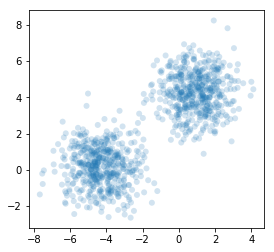

In [4]:
random.seed(3)

X,_ = datasets.make_blobs(n_samples=1000, centers=2, cluster_std=1.1)

figure(); subplot(111,aspect='equal'); 
scatter(X[:,0], X[:,1], alpha=0.2, edgecolor='none');

In [5]:
# Reshape data for broadcasting
m1 = X[np.newaxis, :, :]
m2 = X[:, np.newaxis, :]
print (X.shape)
print (m1.shape)
print (m2.shape)

(1000, 2)
(1, 1000, 2)
(1000, 1, 2)


- Build the adjacency matrix

In [6]:
# Pairwise distances
r = m1 - m2
print (r.shape)
r *= r 
d2 = r.sum(axis=2)
print (d2.shape)

(1000, 1000, 2)
(1000, 1000)


Symmetric? True


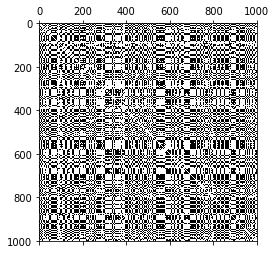

In [7]:
# adjacency matrix
A = (d2<9)
fill_diagonal(A,False)
A = A.astype(np.float)
print ('Symmetric?', np.allclose(A,A.T) )
spy(A);

- Calculate the $D$ degree matrix and the $L$ graph Laplacian, then solve the eigenproblem of $L$

-2.6785936875104894e-13 4.142642020705056 (1000,) (1000, 1000)


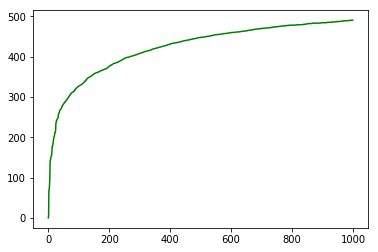

In [8]:
dd = A.sum(axis=0)
D = diag(dd)

L = D - A

w, v = linalg.eigh(L)

print (w[0], w[1], w.shape, v.shape)
plot(w,'g');

- Study the eigenvalues and eigenvectors

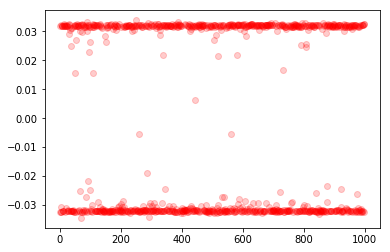

In [9]:
plot(v[:,1], 'or', alpha=0.2);

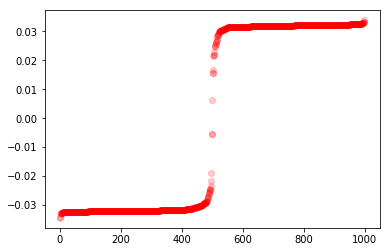

In [10]:
s = argsort(v[:,1])
plot(v[s,1], 'ro', alpha=0.2);

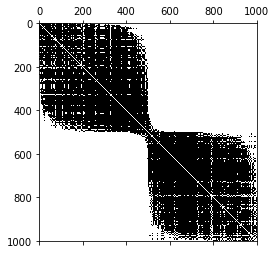

In [11]:
i,j = meshgrid(s,s)
spy(A[i,j]);

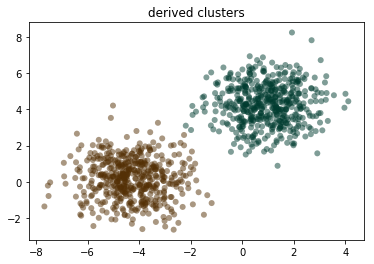

In [12]:
labels = (v[:,1] < 0)
scatter(X[:,0], X[:,1], c=labels, cmap=cm.BrBG, alpha=0.5, edgecolor='none'); title('derived clusters');

### Exercise

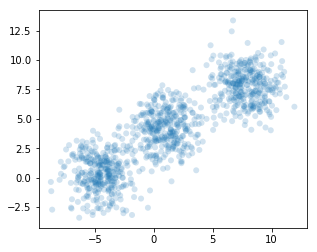

In [13]:
np.random.seed(3) 
X,_ = datasets.make_blobs(n_samples=1000, centers=3, cluster_std=1.5)
np.savetxt("files/Class-Blobs.csv", X, delimiter=",")

figure(); subplot(111,aspect='equal'); 
scatter(X[:,0], X[:,1], alpha=0.2, edgecolor='none');
del X

In [14]:
X = loadtxt('files/Class-Blobs.csv', delimiter=',')
X.shape

(1000, 2)

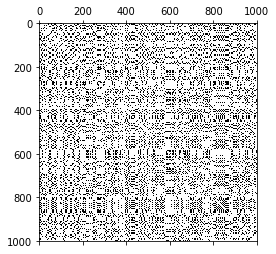

In [15]:
d2 = np.square(X[newaxis,:,:]-X[:,newaxis,:]).sum(axis=2)
A = (d2<9).astype(np.float)
np.fill_diagonal(A,0)
spy(A);

4.6485411310302286e-14 1.8248789677316601 (1000,) (1000, 1000)


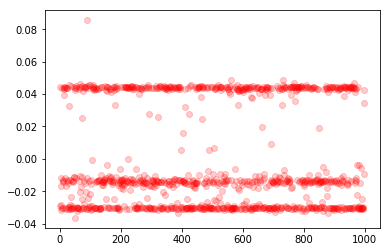

In [16]:
dd = A.sum(axis=0)
D = diag(dd)
L = D - A
w, v = linalg.eigh(L)

print (w[0], w[1], w.shape, v.shape)
plot(v[:,1], 'or', alpha=0.2);

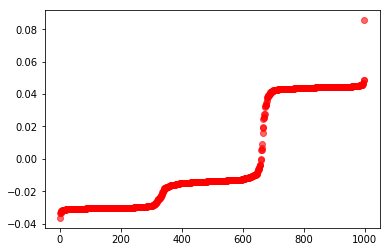

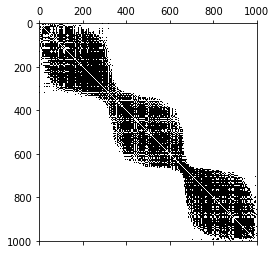

In [17]:
s = argsort(v[:,1])
plot(v[s,1], 'ro', alpha=0.6);
i,j = meshgrid(s,s)
figure(); spy(A[i,j]);

### Unhomework

- Cluster the point set below using the spectral method

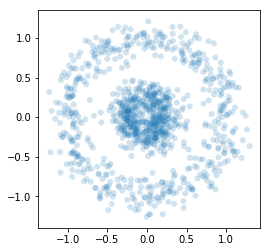

In [18]:
np.random.seed(45)
X,_ = datasets.make_circles(n_samples=1000,factor=0.25, noise=.12)

subplot(111,aspect='equal'); scatter(X[:,0],X[:,1], alpha=0.2,edgecolor='none');

<h1><font color="darkblue">Summary of Spectral Clustering</font></h1>
<hr/>

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering

### Procedure

- Data
> $ X = (x_{ij})_{n \times d} $

- Compute the similarity matrix of $ X $
> For example, Gaussian similarity function
>
> $ \displaystyle s(\mathbf{x_i}, \mathbf{x_j}) = e^{- \frac{\lvert\lvert \mathbf{x_i} - \mathbf{x_j} \rvert\rvert^2}{2 \sigma^2}} $

- Compute the Laplacian matrix $ L $ and the SVD of $ L $
> $ L = D − W $
> 
> $ W = (w_{ij})_{n \times n} \quad $ is weight matrix
> 
> $ D = \text{diag}(d_{ii}) \quad $ where $ \quad \displaystyle d_{ii} = \sum_j w_{ij}$

- Choose the first $ k $ singular vectors and use them to form a new matrix
> $ X_k = (\widetilde{x}_{ij})_{n \times k} $

- Use K-means/GMM to cluster $ X_k $

### Example

In [33]:
# Generate data
n_samples = 1500
random_state = 2018
X, y = datasets.make_circles(n_samples=n_samples, factor=0.4, noise=0.05, random_state=random_state)

In [34]:
# K-Means
c1 = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

In [35]:
# GMM
c2 = GaussianMixture(n_components=2, covariance_type='full', random_state=random_state).fit(X).predict(X)

In [36]:
# Spectral Clustering
c3 = SpectralClustering(n_clusters=2, gamma=100).fit_predict(X)

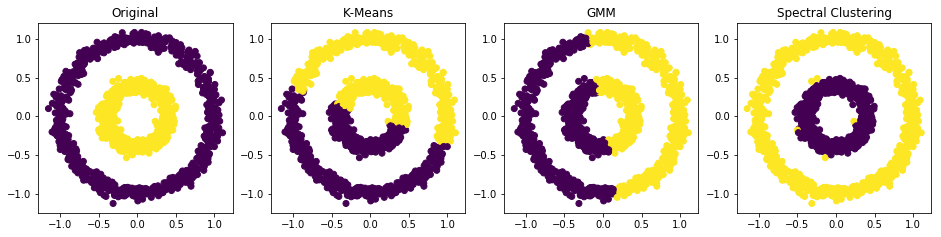

In [37]:
figure(figsize=(16, 6))
subplot(141, aspect='equal');
title('Original');
scatter(X[:,0], X[:,1], c=y);
subplot(142, aspect='equal');
title('K-Means');
scatter(X[:,0], X[:,1], c=c1);
subplot(143, aspect='equal');
title('GMM');
scatter(X[:,0], X[:,1], c=c2);
subplot(144, aspect='equal');
title('Spectral Clustering');
scatter(X[:,0], X[:,1], c=c3);

In [38]:
X2, y2 = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=random_state)

In [39]:
# K-Means
c21 = KMeans(n_clusters=2, random_state=random_state).fit_predict(X2)

In [40]:
# GMM
c22 = GaussianMixture(n_components=2, covariance_type='full', random_state=random_state).fit(X2).predict(X2)

In [41]:
# Spectral Clustering
c23 = SpectralClustering(n_clusters=2, gamma=100).fit_predict(X2)

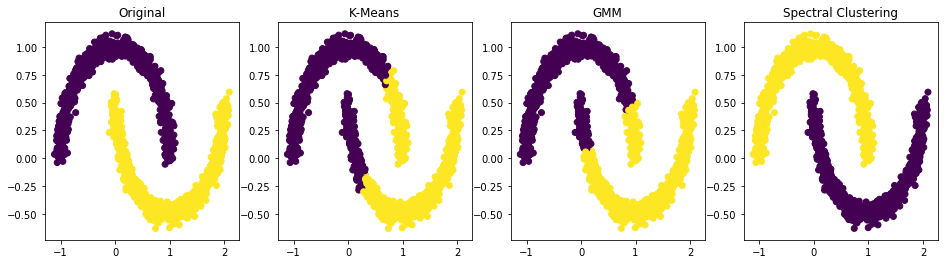

In [42]:
figure(figsize=(16, 4))
subplot(141);
title('Original');
scatter(X2[:,0], X2[:,1], c=y2);
subplot(142);
title('K-Means');
scatter(X2[:,0], X2[:,1], c=c21);
subplot(143);
title('GMM');
scatter(X2[:,0], X2[:,1], c=c22);
subplot(144);
title('Spectral Clustering');
scatter(X2[:,0], X2[:,1], c=c23);

- **Note:** For `SpectralClustering` in scikit-learn
> When calling `fit`, an affinity matrix is constructed using either kernel function such the Gaussian (aka RBF) kernel of the euclidean distanced `d(X,X)`: `np.exp(-gamma * d(X,X) ** 2)` or a [k-nearest neighbors connectivity matrix](https://en.wikipedia.org/wiki/Nearest_neighbor_graph).


[References](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html)